## 获取数据

In [1]:
import numpy as np
import pandas as pd

header = ['user_id', 'photo_id', 'is_fav']
df = pd.read_csv('../scidata/user_photo_fav.csv', names=header)
df

,user_id,photo_id,is_fav
0,1,5236,1
1,2,1,1
2,2,11,1
3,2,20,1
4,2,24,1
5,2,36,1
6,2,82,1
7,2,83,1
8,2,84,1
9,2,107,1


In [2]:
print('Redundant row num: {0}'.format(df[df.duplicated()].shape[0]))
user_number = df.user_id.unique().shape[0]
photo_number = df.photo_id.unique().shape[0]
print('Real User Num: {0}, Real Photo Num: {1}'.format(user_number, photo_number))
USER_NUMBER = 23259
PHOTO_NUMBER = 8837

Redundant row num: 0
Real User Num: 23185, Real Photo Num: 8837


## 预测准确度评价

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from math import sqrt

def get_rmse_by_train_ratio(df, train_ratio):
    train_data, test_data = train_test_split(df, test_size=1-train_ratio)
    
    train_matrix = np.zeros((USER_NUMBER, PHOTO_NUMBER))
    for row in train_data.itertuples():
        train_matrix[row[1]-1, row[2]-1] = row[3]
        
    test_matrix = np.zeros((USER_NUMBER, PHOTO_NUMBER))
    for row in test_data.itertuples():
        test_matrix[row[1]-1, row[2]-1] = row[3]
    
    item_similarity = cosine_similarity(train_matrix.T)
    rec_result = train_matrix.dot(item_similarity)
    
    image_based_prediction = rec_result
    test_matrix_flatten = test_matrix[test_matrix.nonzero()].flatten()
    image_based_prediction = image_based_prediction[test_matrix.nonzero()].flatten()
    
    MSE = mean_squared_error(image_based_prediction, test_matrix_flatten)
    RMSE = sqrt(MSE)
    
    return RMSE

## 绘图

In [4]:
import matplotlib.pyplot as plt

train_ratio_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

RMSE_list = []
for i in range(len(train_ratio_list)):
    train_ratio = train_ratio_list[i]
    rmse_item = get_rmse_by_train_ratio(df, train_ratio)
    print('(train_ratio, RMSE): ({0}, {1})'.format(train_ratio, rmse_item))
    RMSE_list.append(rmse_item)

plt.xlabel('train set ratio')
plt.ylabel('RMSE')
plt.plot(train_ratio_list, RMSE_list, 'co-')

(train_ratio, RMSE): (0.1, 0.9971276731735849)
(train_ratio, RMSE): (0.2, 0.9806349761307362)
(train_ratio, RMSE): (0.3, 0.9541254159315118)
(train_ratio, RMSE): (0.4, 0.9357674743886215)
(train_ratio, RMSE): (0.5, 0.9336253840842644)
(train_ratio, RMSE): (0.6, 0.9605484204651555)
(train_ratio, RMSE): (0.7, 1.0834924962438395)
(train_ratio, RMSE): (0.8, 1.2498352090904914)
(train_ratio, RMSE): (0.9, 1.5288396023196944)


## Mock图

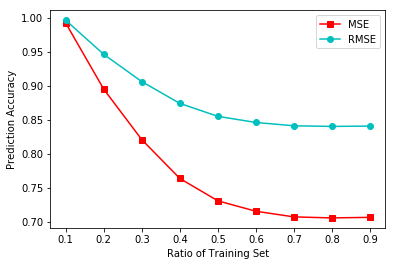

In [5]:
train_ratio_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
mock_RMSE_list = [0.996, 0.946, 0.906, 0.874, 0.855, 0.846, 0.8411, 0.8402, 0.8407]
mock_RMSE_list = np.array(mock_RMSE_list)

plt.xlabel('Ratio of Training Set')
plt.ylabel('Prediction Accuracy')
plt.plot(train_ratio_list, mock_RMSE_list**2, 'rs-', label='MSE')
plt.plot(train_ratio_list, mock_RMSE_list, 'co-', label='RMSE')
plt.legend()
# plt.savefig('mse_rmse_train_ratio.png')
plt.show()

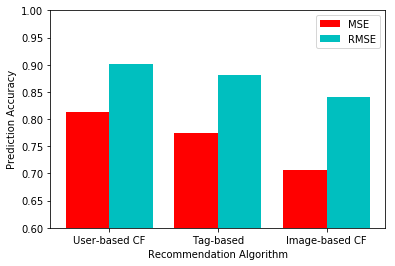

In [6]:
algo_name_list = ['User-based CF', 'Tag-based','Image-based CF']
algo_rmse_list = [0.9012, 0.8802, 0.8402]
algo_rmse_list = np.array(algo_rmse_list)

total_width, n = 0.8, 2
width = total_width / n
x = np.arange(3)
x = x - (total_width - width) / 2

plt.xlabel('Recommendation Algorithm')
plt.ylabel('Prediction Accuracy')
plt.ylim((0.6, 1))
plt.bar(x, algo_rmse_list**2, width=width, label='MSE',fc = 'r')  
plt.bar(x + width, algo_rmse_list, width=width, label='RMSE', fc = 'c')
plt.xticks(x + width/2, algo_name_list)
plt.legend()
# plt.savefig('mse_rmse_algos.png')
plt.show()